# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [52]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [53]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    response = requests.get(city_url).json()
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = response["weather"][0]["description"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | urucara
Processing Record 2 of Set 1 | pokhara
Processing Record 3 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | mejit
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | walvis bay
Processing Record 10 of Set 1 | san antonio de pale
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | bodo
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | balykshi
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | prainha
Processing Record 19 of Set 1 | asifabad
Processing Record 20 of Set 1 | portland
Processing Record 21 of

Processing Record 38 of Set 4 | port mathurin
Processing Record 39 of Set 4 | polyarnyy
Processing Record 40 of Set 4 | dingli
Processing Record 41 of Set 4 | atafu village
Processing Record 42 of Set 4 | dudinka
Processing Record 43 of Set 4 | zheleznogorsk-ilimskiy
Processing Record 44 of Set 4 | port shepstone
Processing Record 45 of Set 4 | salalah
Processing Record 46 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 47 of Set 4 | aomori
Processing Record 48 of Set 4 | sao vicente
Processing Record 49 of Set 4 | al azraq ash shamali
City not found. Skipping...
Processing Record 0 of Set 5 | hirara
Processing Record 1 of Set 5 | arraial do cabo
Processing Record 2 of Set 5 | alexandria
Processing Record 3 of Set 5 | cable beach
City not found. Skipping...
Processing Record 4 of Set 5 | koryazhma
Processing Record 5 of Set 5 | mata-utu
Processing Record 6 of Set 5 | ceyhan
Processing Record 7 of Set 5 | prince rupert
Processing Record 8 of Set 5 | kamaishi
Processing 

Processing Record 28 of Set 8 | brisas de zicatela
Processing Record 29 of Set 8 | tromso
Processing Record 30 of Set 8 | baise city
Processing Record 31 of Set 8 | naifaru
Processing Record 32 of Set 8 | peruibe
Processing Record 33 of Set 8 | marion
Processing Record 34 of Set 8 | orkney
Processing Record 35 of Set 8 | latakia
Processing Record 36 of Set 8 | crucecita
Processing Record 37 of Set 8 | alice springs
Processing Record 38 of Set 8 | coro
Processing Record 39 of Set 8 | rio verde de mato grosso
Processing Record 40 of Set 8 | kultali
City not found. Skipping...
Processing Record 41 of Set 8 | sao geraldo do araguaia
Processing Record 42 of Set 8 | redencao
Processing Record 43 of Set 8 | essaouira
Processing Record 44 of Set 8 | malango
Processing Record 45 of Set 8 | ar rutbah
Processing Record 46 of Set 8 | muzayri'
City not found. Skipping...
Processing Record 47 of Set 8 | saldanha
Processing Record 48 of Set 8 | fada
Processing Record 49 of Set 8 | porbandar
Processin

City not found. Skipping...
Processing Record 14 of Set 12 | teluk nibung
Processing Record 15 of Set 12 | krasnoufimsk
Processing Record 16 of Set 12 | verkhotur'ye
Processing Record 17 of Set 12 | elmendorf air force base
City not found. Skipping...
Processing Record 18 of Set 12 | ankazoabo
Processing Record 19 of Set 12 | mahajanga
Processing Record 20 of Set 12 | bargara
City not found. Skipping...
Processing Record 21 of Set 12 | lhasa
Processing Record 22 of Set 12 | yarumal
Processing Record 23 of Set 12 | bubaque
Processing Record 24 of Set 12 | oriximina
Processing Record 25 of Set 12 | bageshwar
Processing Record 26 of Set 12 | muroto-misakicho
Processing Record 27 of Set 12 | oroqen zizhiqi
Processing Record 28 of Set 12 | rodriguez
Processing Record 29 of Set 12 | san isidro
Processing Record 30 of Set 12 | el fasher
Processing Record 31 of Set 12 | chita
Processing Record 32 of Set 12 | iquique
Processing Record 33 of Set 12 | hadibu
Processing Record 34 of Set 12 | tshel

In [54]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [55]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,urucara,-2.5364,-57.7600,33.48,44,4,2.67,BR,1685637000
1,pokhara,28.2333,83.9833,24.91,36,36,3.17,NP,1685637000
2,longyearbyen,78.2186,15.6401,1.91,60,20,4.63,SJ,1685636892
3,tiksi,71.6872,128.8694,2.29,63,80,2.99,RU,1685637001
4,mejit,10.2753,170.8646,27.50,77,100,6.76,MH,1685637001


In [56]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [57]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,urucara,-2.5364,-57.7600,33.48,44,4,2.67,BR,1685637000
1,pokhara,28.2333,83.9833,24.91,36,36,3.17,NP,1685637000
2,longyearbyen,78.2186,15.6401,1.91,60,20,4.63,SJ,1685636892
3,tiksi,71.6872,128.8694,2.29,63,80,2.99,RU,1685637001
4,mejit,10.2753,170.8646,27.50,77,100,6.76,MH,1685637001


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

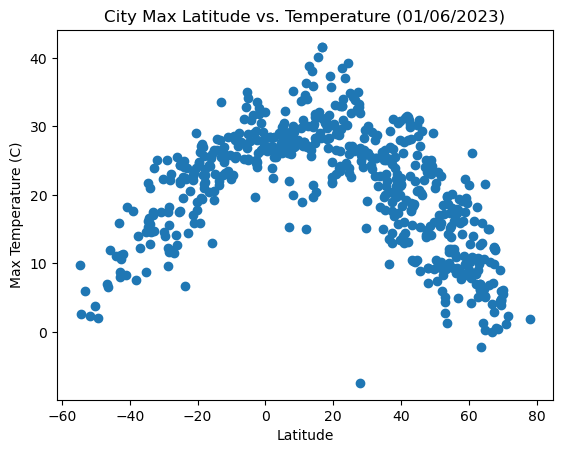

In [58]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (01/06/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

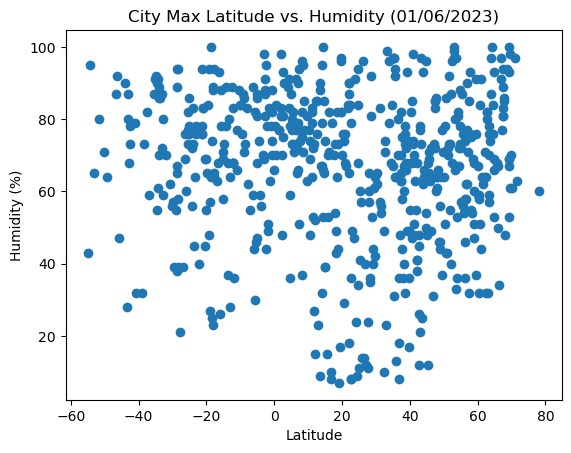

In [59]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (01/06/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

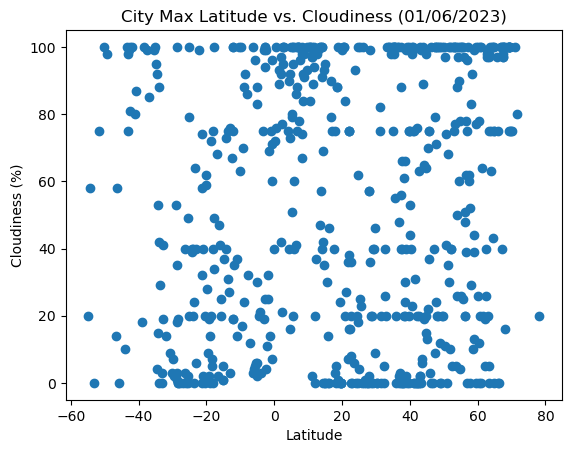

In [60]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (01/06/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

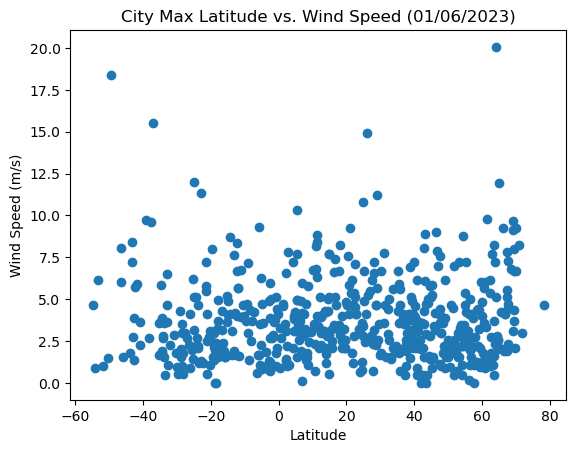

In [61]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (01/06/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_label, y_label, title, label_position):
    
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.annotate(line_eq,(label_position),fontsize=15,color="red")
    plt.show()
    print(f"The r-value is {st.pearsonr(x_values, y_values)[0]}")


In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pokhara,28.2333,83.9833,24.91,36,36,3.17,NP,1685637000
2,longyearbyen,78.2186,15.6401,1.91,60,20,4.63,SJ,1685636892
3,tiksi,71.6872,128.8694,2.29,63,80,2.99,RU,1685637001
4,mejit,10.2753,170.8646,27.50,77,100,6.76,MH,1685637001
9,hawaiian paradise park,19.5933,-154.9731,21.69,97,0,2.57,US,1685637002


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,urucara,-2.5364,-57.7600,33.48,44,4,2.67,BR,1685637000
5,adamstown,-25.0660,-130.1015,24.30,86,100,11.98,PN,1685637001
6,margaret river,-33.9500,115.0667,12.87,70,88,3.55,AU,1685637001
7,walvis bay,-22.9575,14.5053,14.49,76,6,1.32,NaN,1685637001
8,san antonio de pale,-1.4014,5.6325,26.53,83,69,3.62,GQ,1685637001


###  Temperature vs. Latitude Linear Regression Plot

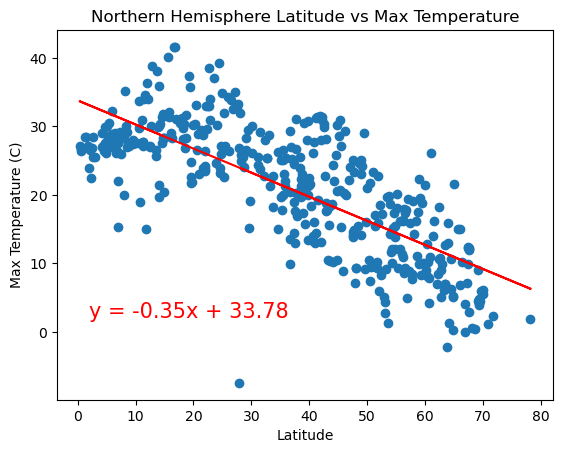

The r-value is -0.7590191639317609


In [65]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (C)", 
                  "Northern Hemisphere Latitude vs Max Temperature", (2, 2))

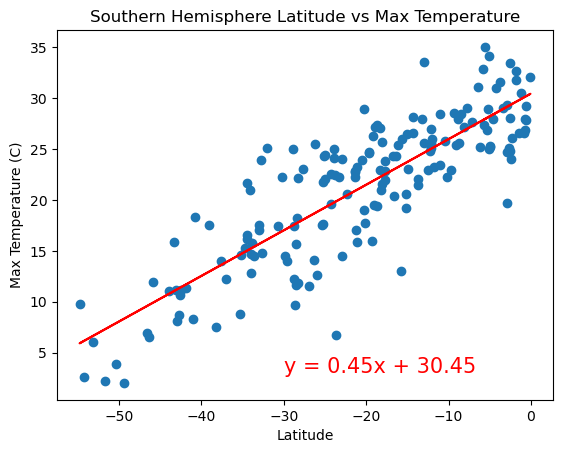

The r-value is 0.8459761894781586


In [66]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (C)", 
                  "Southern Hemisphere Latitude vs Max Temperature", (-30, 3))

**Discussion about the linear relationship:** From these plots we can see that Latitude and Temperature have a strong negative correlation in the Northern Hemisphere and a strong positive correlation in the Southern Hemisphere. Not only is there correlation between the variables, we can see that temperatures are highest when the Latitude value is close to 0. This supports the conclusion that global temperatures are highest around the equator.

### Humidity vs. Latitude Linear Regression Plot

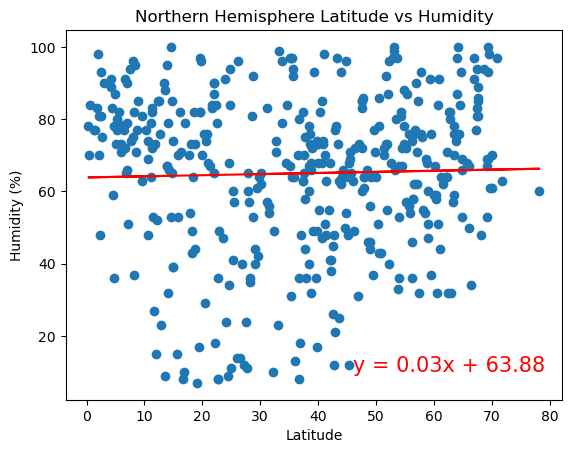

The r-value is 0.028166202973567697


In [67]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", 
                  "Northern Hemisphere Latitude vs Humidity", (46, 10))

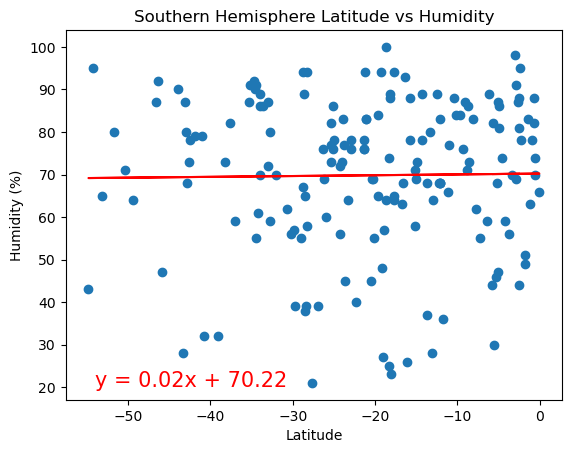

The r-value is 0.01436342896435314


In [68]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", 
                  "Southern Hemisphere Latitude vs Humidity", (-54, 20))

**Discussion about the linear relationship:** From these plots we can see that irrespective of hemisphere, humidity does not seem to have any significant correlation with latitude.

### Cloudiness vs. Latitude Linear Regression Plot

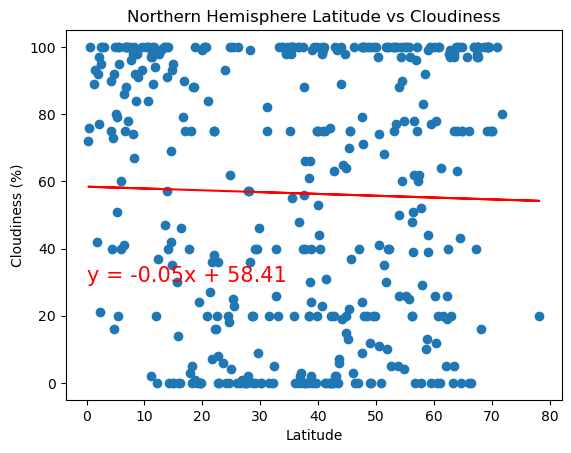

The r-value is -0.027739352133511242


In [69]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", 
                  "Northern Hemisphere Latitude vs Cloudiness", (0, 30))

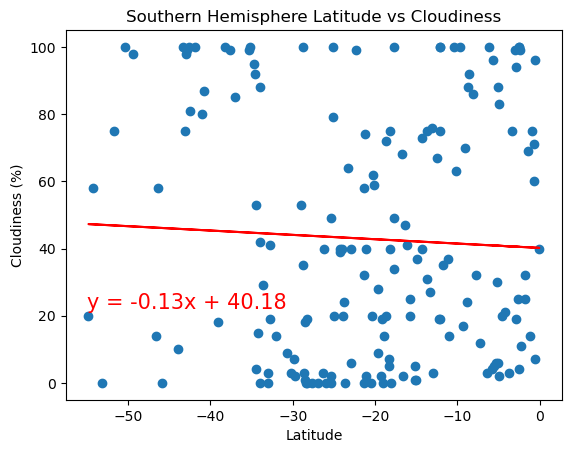

The r-value is -0.048735706293638076


In [70]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", 
                  "Southern Hemisphere Latitude vs Cloudiness", (-55, 22))

**Discussion about the linear relationship:** From these plots we can see that irrespective of hemisphere, cloudiness does not seem to have any significant correlation with latitude.

### Wind Speed vs. Latitude Linear Regression Plot

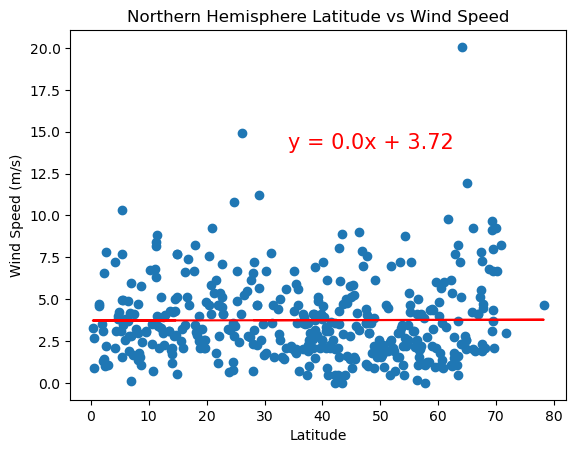

The r-value is 0.005341689435833623


In [71]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", 
                  "Northern Hemisphere Latitude vs Wind Speed", (34, 14))

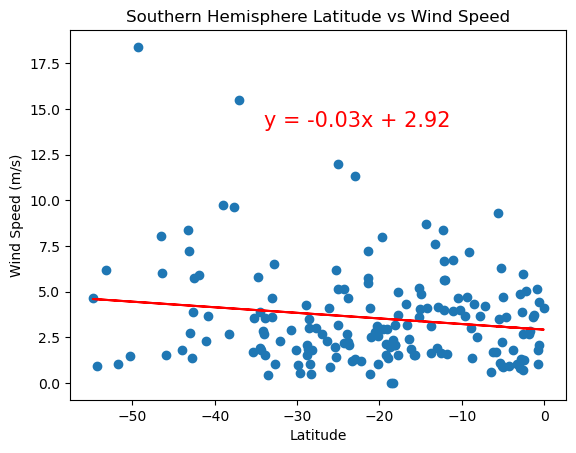

The r-value is -0.15376089403917018


In [72]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", 
                  "Southern Hemisphere Latitude vs Wind Speed", (-34, 14))

**Discussion about the linear relationship:** From these plots we can see that irrespective of hemisphere, wind speed does not seem to have any significant correlation with latitude.